# Linear Regression

## Using the Boston Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
dataset = load_boston()


In [2]:
print(dataset.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(dataset.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
print(dataset.target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['MEDV'] = dataset.target
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Cleansing

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
print(df.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Feature Selection

In [9]:
corr = df.corr()
print(corr)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

In [10]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])


Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


## Multiple Regression

Text(0,0.5,'MEDV')

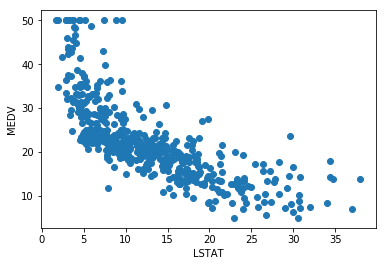

In [11]:
%matplotlib inline

plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')


Text(0,0.5,'MEDV')

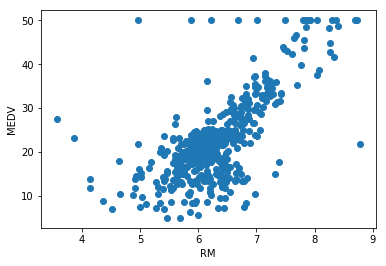

In [12]:
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')


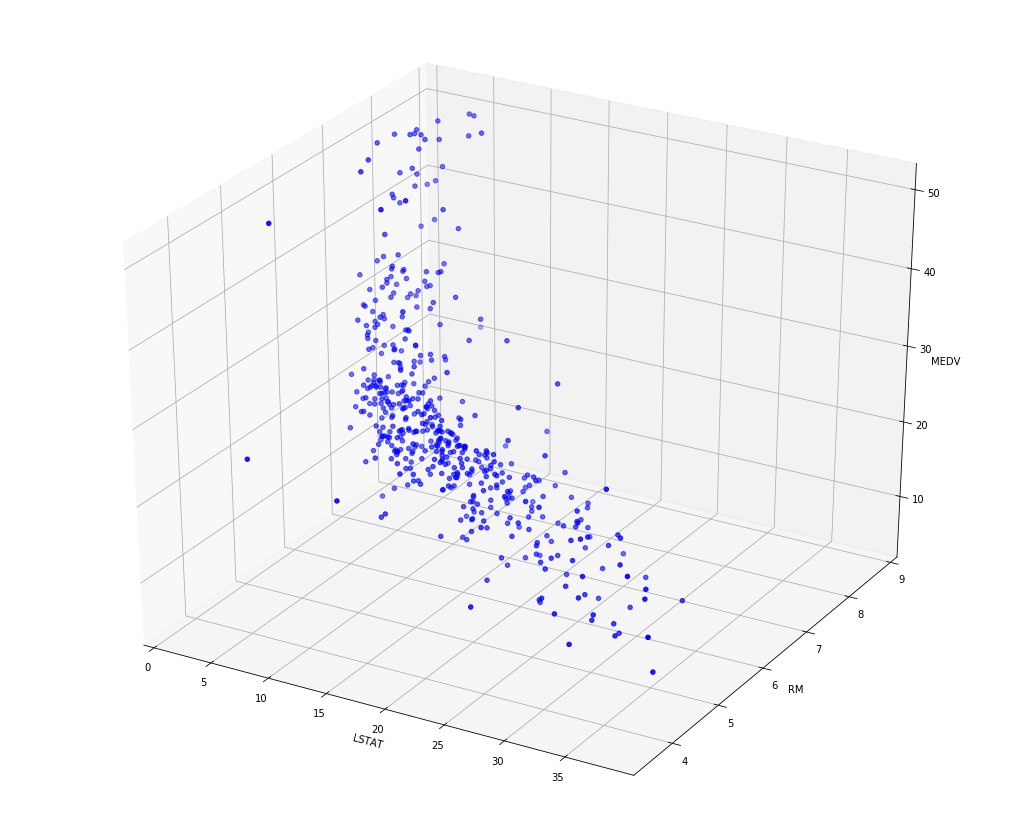

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()


## Training the Model

In [14]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [16]:
print(x_train.shape)
print(Y_train.shape)


(354, 2)
(354,)


In [17]:
print(x_test.shape)
print(Y_test.shape)


(152, 2)
(152,)


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
price_pred = model.predict(x_test)


In [20]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))


R-squared: 0.6162


36.494221109153244


Text(0.5,1,'Actual prices vs Predicted prices')

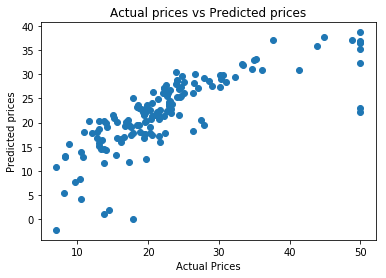

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")


## Getting the Intercept and Coefficients

In [22]:
print(model.intercept_)
print(model.coef_)


0.3843793678034899
[-0.65957972  4.83197581]


In [23]:
print(model.predict([[30,5]]))


[4.75686695]


## Plotting the 3D Hyperplane

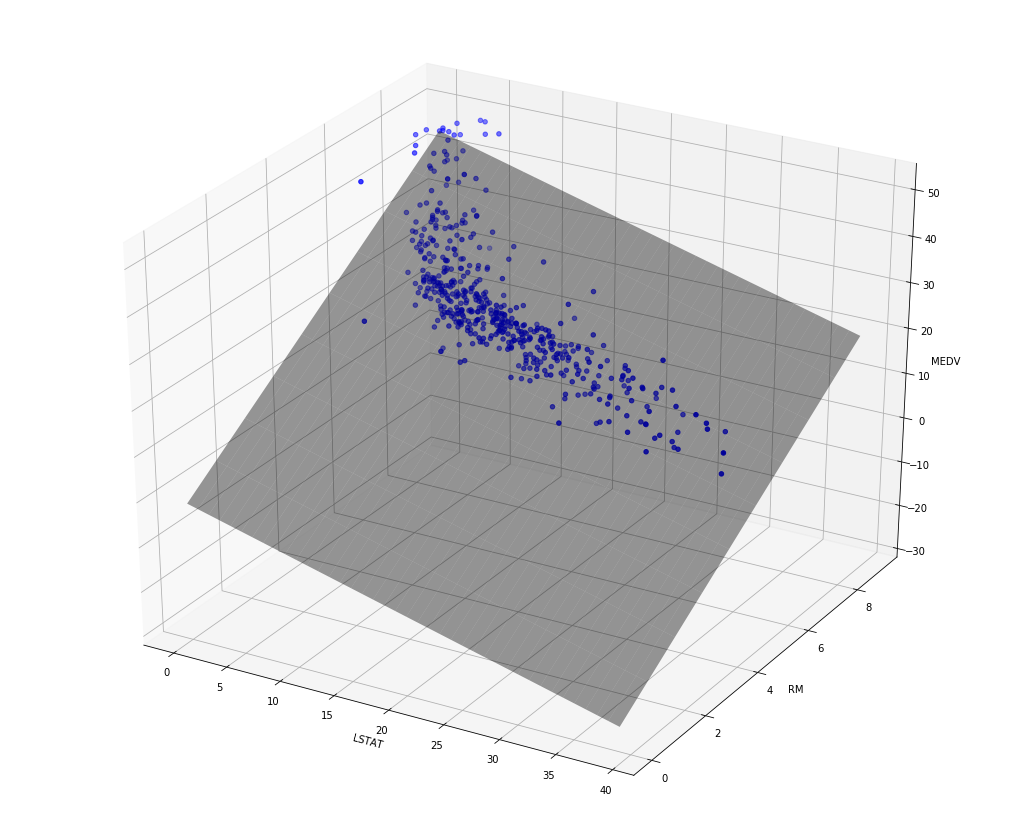

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file. 

# Polynomial Regression

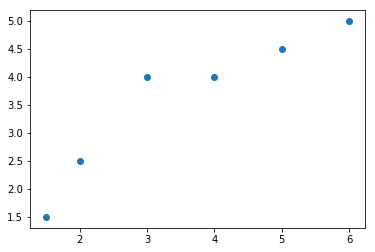

In [25]:
df = pd.read_csv('polynomial.csv')
plt.scatter(df.x,df.y)


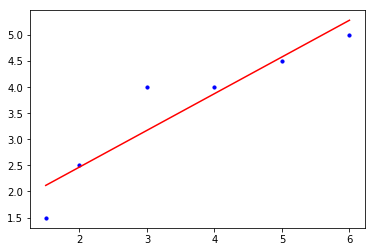

R-squared for training set: 0.8658


In [26]:
model = LinearRegression()

x = df.x[0:6, np.newaxis]     #---convert to 2D array---
y = df.y[0:6, np.newaxis]     #---convert to 2D array---

model.fit(x,y)

#---perform prediction---
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x, y, s=10, color='b')

#---plot the straight line---
plt.plot(x, y_pred, color='r')
plt.show()

#---calculate R-squared---
print('R-squared for training set: %.4f' % model.score(x,y))


## Formula for Polynomial Regression

A polynomial function of degree 1 has the following form:

Y = β0 + β1x

Quadratic regression is a degree 2 

Y = β0 + β1x + β2x2

For a polynomial of degree 3, the formula is as follows:

Y = β0 + β1x + β2x2 + β3x3

In general, a polynomial of degree n has the formula of:

Y = β0 + β1x + β2x2 + β3x3 + … + βnxn

The idea behind polynomial regression is simple — find the coefficients of the polynomial function that best fits the data.


## Polynomial Regression in Scikit-learn

In [27]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2

polynomial_features = PolynomialFeatures(degree = degree)


In [28]:
x_poly = polynomial_features.fit_transform(x)
print(x_poly)


[[ 1.    1.5   2.25]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    5.   25.  ]
 [ 1.    6.   36.  ]]


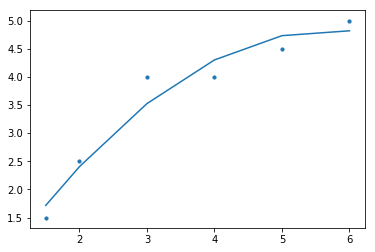

In [29]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#---plot the points---
plt.scatter(x, y, s=10)

#---plot the regression line---
plt.plot(x, y_poly_pred)
plt.show()


In [30]:
print(model.intercept_)
print(model.coef_)


[-0.87153912]
[[ 0.          1.98293207 -0.17239897]]


In [31]:
print('R-squared for training set: %.4f' % model.score(x_poly,y))


R-squared for training set: 0.9474


## Using Polynomial Multiple Regression on the Boston Dataset

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [33]:
#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)


When using a polynomial function of degree 2 on two independent variables x1 and x2, the formula becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

where Y is the dependent variable, β0 is the intercept, β1, β2, β3, and β4 are the coefficients of the various combinations of the two features x1 and x2, respectively.


In [34]:
#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))


['1', 'x', 'y', 'x^2', 'x y', 'y^2']


In [35]:
model = LinearRegression()
model.fit(x_train_poly, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-squared: %.4f' % model.score(x_test_poly,
                                      Y_test))


R-squared: 0.7340


In [37]:
print(model.intercept_)
print(model.coef_)


26.93343052383921
[ 0.00000000e+00  1.47424550e+00 -6.70204730e+00  7.93570743e-04
 -3.66578385e-01  1.17188007e+00]


With these values, the formula now becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

Y = 26.9334305238 + 1.47424550e+00 x1 + (-6.70204730e+00) x2 + 7.93570743e-04 x12 + (-3.66578385e-01) x1x2 + 1.17188007e+00 x22


## Plotting the 3D Hyperplane

['1', 'x', 'y', 'x^2', 'x y', 'y^2']


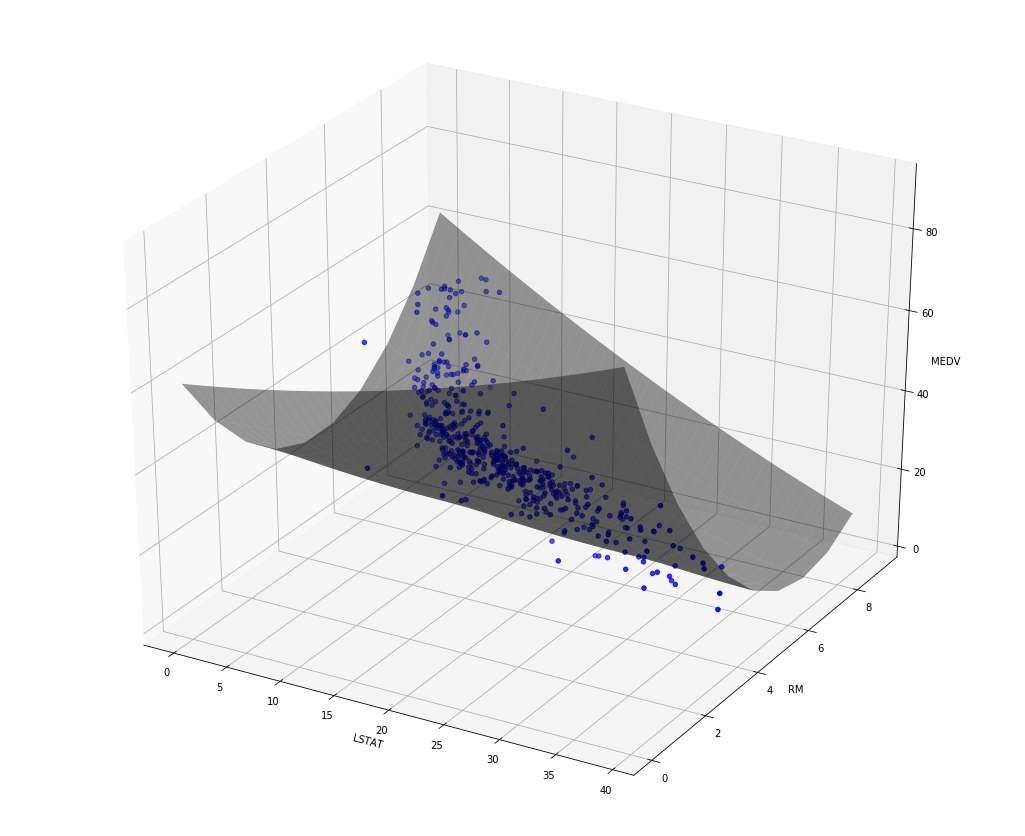

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))

#---apply linear regression---
model = LinearRegression()
model.fit(x_poly, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ +
                (model.coef_[1] * x) +
                (model.coef_[2] * y) +
                (model.coef_[3] * x**2) +
                (model.coef_[4] * x*y) +
                (model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file.